## Neural Networks

The same model selection process can also be used when choosing between different neural network architectures. In this section, you will create the models shown below and apply it to the same regression task above.



### Prepare the Data

You will use the same training, cross validation, and test sets you generated in the previous section. From earlier lectures in this course, you may have known that neural networks can learn non-linear relationships so you can opt to skip adding polynomial features. The code is still included below in case you want to try later and see what effect it will have on your results. The default `degree` is set to `1` to indicate that it will just use `x_train`, `x_cv`, and `x_test` as is (i.e. without any additional polynomial features).

In [1]:

import numpy as np




import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense







In [2]:

data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')



x = data[:,0]
y = data[:,1]

# Convert 1-D arrays into 2-D because the commands later will require it
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs x is: (50, 1)
the shape of the targets y is: (50, 1)


In [3]:
import matplotlib.pyplot as plt 
def plot_dataset(x, y, title):
    plt.rcParams["figure.figsize"] = (12,8)
    plt.rcParams["lines.markersize"] = 12
    plt.scatter(x, y, marker='x', c='r'); 
    plt.title(title)
    plt.xlabel("x"); 
    plt.ylabel("y"); 
    plt.show()

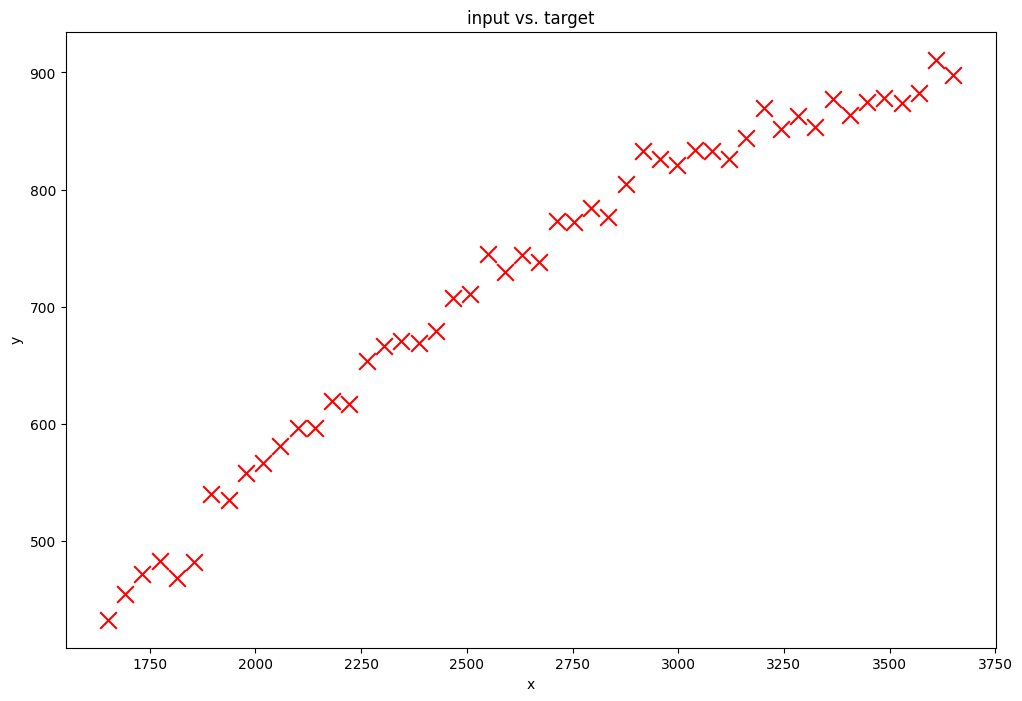

In [4]:
plot_dataset(x=x, y=y, title="input vs. target")

In [7]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
from sklearn.model_selection import train_test_split
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


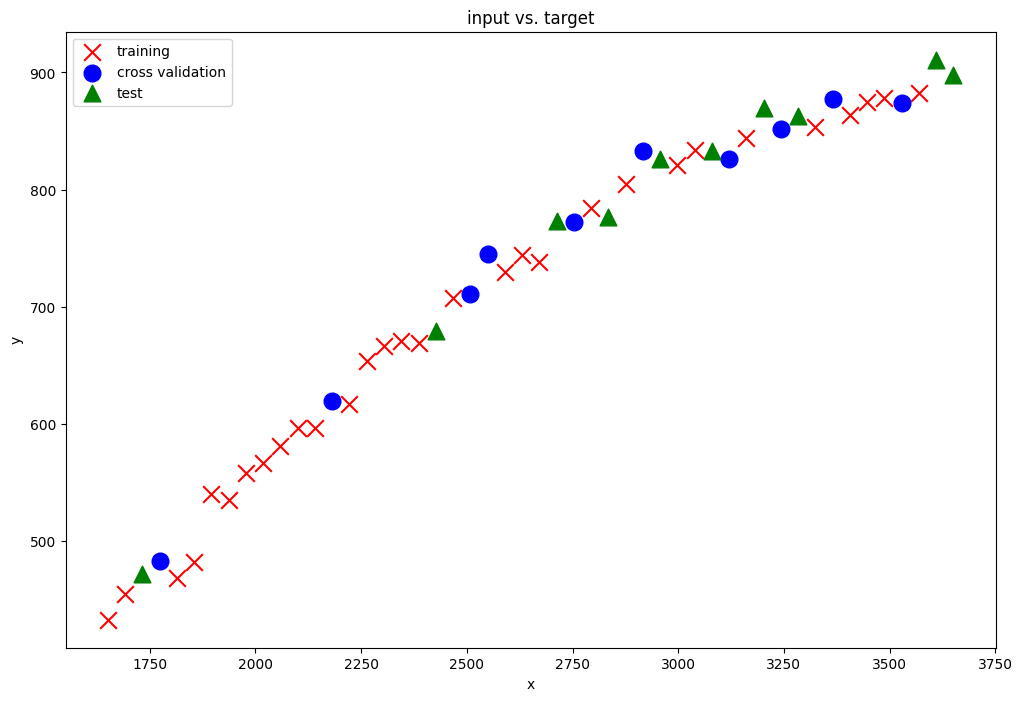

In [8]:
def plot_train_cv_test(x_train, y_train, x_cv, y_cv, x_test, y_test, title):
    plt.scatter(x_train, y_train, marker='x', c='r', label='training'); 
    plt.scatter(x_cv, y_cv, marker='o', c='b', label='cross validation'); 
    plt.scatter(x_test, y_test, marker='^', c='g', label='test'); 
    plt.title("input vs. target")
    plt.xlabel("x"); 
    plt.ylabel("y"); 
    plt.legend()
    plt.show()

plot_train_cv_test(x_train, y_train, x_cv, y_cv, x_test, y_test, title="input vs. target")

In [10]:
# Add polynomial features

from sklearn.preprocessing import PolynomialFeatures,StandardScaler
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

In [11]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

### Model we will use

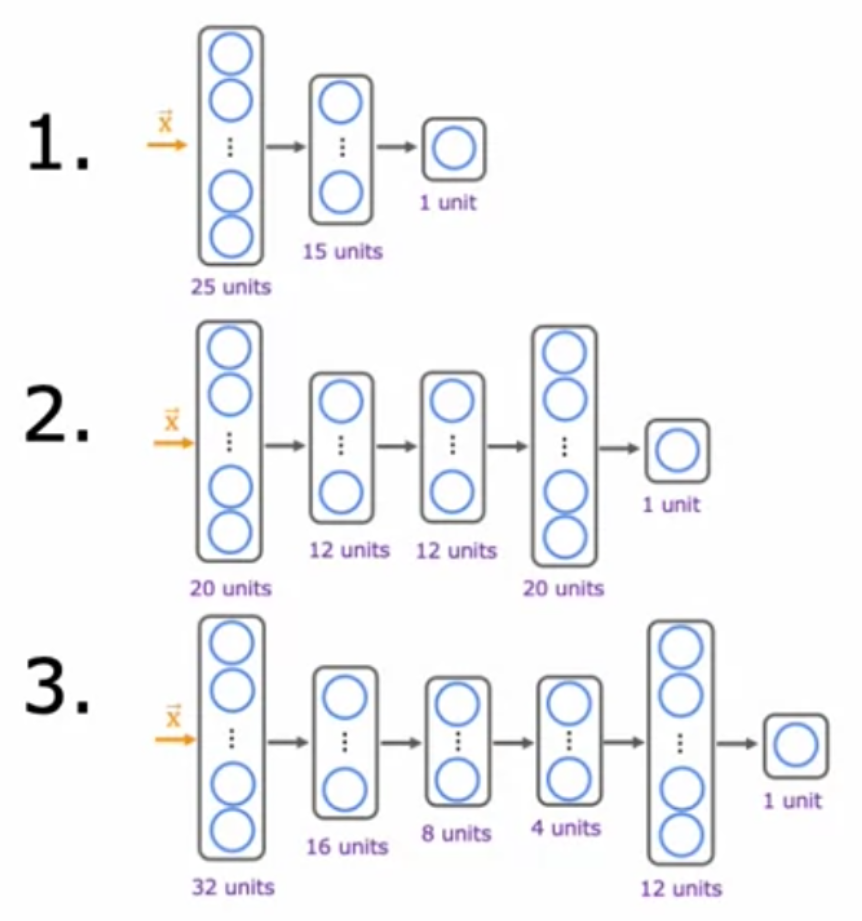

In [12]:

def build_models():
    
    tf.random.set_seed(20)
    
    model_1 = Sequential(
        [
            Dense(25, activation = 'relu'),
            Dense(15, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(8, activation = 'relu'),
            Dense(4, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
    
    model_list = [model_1, model_2, model_3]
    
    return model_list

In [15]:
nn_models=build_models()
from sklearn.metrics import mean_squared_error
mse_train=[]
mse_cv=[]

In [17]:
for model in nn_models:
    model.compile(
        loss='mse',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)

    )

    model.fit(X_train_mapped_scaled,y_train,
              epochs=300,
              verbose=0)
    
    print(f"Training of {model.name}")
    yhat=model.predict(X_train_mapped_scaled)

    mse=mean_squared_error(yhat,y_train)/2
    mse_train.append(mse)

    yhat=model.predict(X_cv_mapped_scaled)

    mse=mean_squared_error(yhat,y_cv)/2
    mse_cv.append(mse)

Training of model_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Training of model_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Training of model_3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [18]:
i=0
for model in nn_models:
    print(f"{model.name} Training MSE:{mse_train[i]}")
    print(f"{model.name} Cross Validation MSE:{mse_cv[i]}")
    i=i+1

model_1 Training MSE:49.04456375400546
model_1 Cross Validation MSE:82.59512110571374
model_2 Training MSE:73.3961775002483
model_2 Cross Validation MSE:112.2862277266285
model_3 Training MSE:73.3969477195411
model_3 Cross Validation MSE:112.58781702888639


In [20]:
model_selected_by_us=1

# Compute the test MSE
yhat = nn_models[model_selected_by_us-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_selected_by_us}")
print(f"Training MSE: {mse_train[model_selected_by_us-1]:.2f}")
print(f"Cross Validation MSE: {mse_cv[model_selected_by_us-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Selected Model: 1
Training MSE: 49.04
Cross Validation MSE: 82.60
Test MSE: 98.70
